In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Titanic_passenger_List.xlsx', sheet_name='passenger_list')
df2 = pd.read_excel('Titanic_passenger_List.xlsx', sheet_name='Definitions')

In [3]:
df2.head(15)

,Variable,Definition,Key
0,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
1,survival,Survival,"0 = No, 1 = Yes"
2,Name,Name,NaN
3,sex,Sex,NaN
4,Age,Age in years,NaN
5,sibsp,# of siblings / spouses aboard the Titanic,NaN
6,parch,# of parents / children aboard the Titanic,NaN
7,ticket,Ticket number,NaN
8,fare,Passenger fare,NaN
9,cabin,Cabin number,NaN


In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
survived = df[df['survived']==1]
n_survived = df[df['survived']==0]
n_survived.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [43]:
survived_counts = survived.groupby(['sex', 'pclass']).agg(['count']).reset_index()
n_survived_counts = n_survived.groupby(['sex', 'pclass']).agg(['count']).reset_index()

In [44]:
survived_counts = survived_counts[['sex', 'pclass','survived']]
n_survived_counts = n_survived_counts[['sex', 'pclass','survived']]

In [45]:
n_survived_counts.head(15)

,sex,pclass,survived
,,,count
0,female,1,5
1,female,2,12
2,female,3,110
3,male,1,118
4,male,2,146
5,male,3,418


In [46]:
survived_counts.head(15)

,sex,pclass,survived
,,,count
0,female,1,139
1,female,2,94
2,female,3,106
3,male,1,61
4,male,2,25
5,male,3,75


In [48]:
survived_merge = pd.merge(survived_counts, n_survived_counts, how='inner', on='pclass', suffixes=('_y','_n'))

C:\JupyterLab\resources\jlab_server\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [49]:
survived_merge.head()

,sex_y,pclass,survived_y,sex_n,survived_n
,,,count,,count
0,female,1,139,female,5
1,female,1,139,male,118
2,male,1,61,female,5
3,male,1,61,male,118
4,female,2,94,female,12


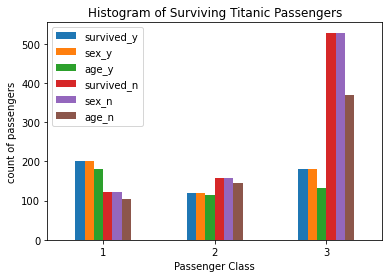

In [11]:
survived_merge.plot(x='pclass', kind='bar', stacked=False, 
                    xlabel='Passenger Class', ylabel='count of passengers',
                    title='Histogram of Surviving Titanic Passengers')
plt.xticks(rotation=0)
plt.show()